<a href="https://colab.research.google.com/github/Gitzav/role_of_data_preparation/blob/main/Data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("rolling_sale_data.xlsx")

*For sales prior to the Final Roll, Neighborhood Name and Descriptive Data reflect the most recent Final Roll. Sales after the Final Roll, Neighborhood Name and Descriptive Data reflect current data.*

*Building Class Category is based on Building Class at Time of Sale.*

*Note: Condominium and cooperative sales are on the unit level and understood to have a count of one.*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79884 entries, 0 to 79883
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         79884 non-null  int64         
 1   NEIGHBORHOOD                    79884 non-null  object        
 2   BUILDING CLASS CATEGORY         79884 non-null  object        
 3   TAX CLASS AT PRESENT            79884 non-null  object        
 4   BLOCK                           79884 non-null  int64         
 5   LOT                             79884 non-null  int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       79884 non-null  object        
 8   ADDRESS                         79884 non-null  object        
 9   APARTMENT NUMBER                19539 non-null  object        
 10  ZIP CODE                        79863 non-null  float64       
 11  RE

In [4]:
df.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,376,43,NaN,S1,743 EAST 6 STREET,NaN,...,1.0,1.0,2.0,2090.0,3680.0,1940.0,1,S1,0,2025-01-23
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,372,19,NaN,C7,"292 EAST 3 STREET, 4B",NaN,...,9.0,1.0,10.0,2401.0,6920.0,1920.0,2,C7,0,2025-02-07
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,396,26,NaN,C4,638 EAST 14 STREET,NaN,...,20.0,0.0,20.0,2779.0,10740.0,1920.0,2,C4,0,2025-05-01
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,396,27,NaN,C4,640 EAST 14 STREET,NaN,...,20.0,0.0,20.0,2831.0,10900.0,1920.0,2,C4,0,2025-05-01
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,400,11,NaN,C4,"510 EAST 5TH STREET, 9",NaN,...,18.0,0.0,18.0,2404.0,6875.0,1900.0,2,C4,280000,2025-04-29


In [5]:
df['SALE DATE'].dt.date.min()

datetime.date(2024, 11, 1)

In [6]:
df['SALE DATE'].dt.date.max()

datetime.date(2025, 10, 31)

In [7]:
df_no_zero = df[df['SALE PRICE'] != 0]

In [8]:
df_no_zero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53228 entries, 4 to 79883
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         53228 non-null  int64         
 1   NEIGHBORHOOD                    53228 non-null  object        
 2   BUILDING CLASS CATEGORY         53228 non-null  object        
 3   TAX CLASS AT PRESENT            53228 non-null  object        
 4   BLOCK                           53228 non-null  int64         
 5   LOT                             53228 non-null  int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       53228 non-null  object        
 8   ADDRESS                         53228 non-null  object        
 9   APARTMENT NUMBER                14644 non-null  object        
 10  ZIP CODE                        53209 non-null  float64       
 11  RESIDEN

### `BUILDING CLASS AT PRESENT` **vs** `BUIDLING CLASS AT TIME OF SALE`

In [9]:
count_class = df['BUILDING CLASS AT PRESENT'].value_counts()
count_class[count_class == 1].index

Index(['J7', 'J9', 'H6', 'P8', 'J8', 'Z4', 'J5', 'W7', 'G5', 'P3', 'DB', 'O3',
       'K3', 'HR'],
      dtype='object', name='BUILDING CLASS AT PRESENT')

In [10]:
changed_building_class = df[df['BUILDING CLASS AT PRESENT'] != df['BUILDING CLASS AT TIME OF SALE']]
changed_building_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 443 to 79778
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         417 non-null    int64         
 1   NEIGHBORHOOD                    417 non-null    object        
 2   BUILDING CLASS CATEGORY         417 non-null    object        
 3   TAX CLASS AT PRESENT            417 non-null    object        
 4   BLOCK                           417 non-null    int64         
 5   LOT                             417 non-null    int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       417 non-null    object        
 8   ADDRESS                         417 non-null    object        
 9   APARTMENT NUMBER                195 non-null    object        
 10  ZIP CODE                        417 non-null    float64       
 11  RESIDEN

In [11]:
count_changed_class = changed_building_class['BUILDING CLASS AT PRESENT'].value_counts()
count_changed_class[count_changed_class == 1].index

Index(['S9', 'K1', 'O5', 'E1', 'A4', 'D1', 'M9', 'K2', 'O2', 'A7', 'E9', 'S1',
       'RG', 'S3', 'M1', 'K9', 'D6', 'Z9', 'G9'],
      dtype='object', name='BUILDING CLASS AT PRESENT')

### **Handling null value of** `LAND SQUARE FEET`

In [12]:
df['LAND SQUARE FEET'].isnull().sum()

np.int64(36720)

In [13]:
df_condo = df[(df['BUILDING CLASS AT PRESENT'].str.match(r'^R'))]

In [14]:
df_condo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21068 entries, 60 to 79750
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         21068 non-null  int64         
 1   NEIGHBORHOOD                    21068 non-null  object        
 2   BUILDING CLASS CATEGORY         21068 non-null  object        
 3   TAX CLASS AT PRESENT            21068 non-null  object        
 4   BLOCK                           21068 non-null  int64         
 5   LOT                             21068 non-null  int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       21068 non-null  object        
 8   ADDRESS                         21068 non-null  object        
 9   APARTMENT NUMBER                19539 non-null  object        
 10  ZIP CODE                        21068 non-null  float64       
 11  RESIDE

Null value because of `BUILDING CLASS AT PRESENT` = R.

In [15]:
df_non_condominium = df[(df['BUILDING CLASS AT PRESENT'].str.match(r'^R') == False) & (df['LAND SQUARE FEET'].isnull())]

In [16]:
df_condominium_not_null_land_square = df[(df['BUILDING CLASS AT PRESENT'].str.match(r'^R') == True) & (df['LAND SQUARE FEET'].isnull() == False)]

In [17]:
df_condominium_not_null_land_square['BUILDING CLASS AT PRESENT'].value_counts()

,count
BUILDING CLASS AT PRESENT,
RR,92


In [18]:
# những loại building khác mà có land square feet bị null
non_condo_classes_have_null_land = df_non_condominium['BUILDING CLASS AT PRESENT'].unique()
non_condo_classes_have_null_land

array(['C6', 'D0', 'D4', 'C8', 'A8', 'C0', 'A1', 'A2', 'V0'], dtype=object)

In [19]:
for c in non_condo_classes_have_null_land:
  print(f"Class: {c}")
  print(f'The number of sale: {len(df[df['BUILDING CLASS AT PRESENT'] == c])}')
  print(f'The number of sale with null LAND SQUARE FEET: {len(df[(df['BUILDING CLASS AT PRESENT'] == c) & (df['LAND SQUARE FEET'].isnull())])}')

Class: C6
The number of sale: 2383
The number of sale with null LAND SQUARE FEET: 2354
Class: D0
The number of sale: 225
The number of sale with null LAND SQUARE FEET: 224
Class: D4
The number of sale: 13035
The number of sale with null LAND SQUARE FEET: 13016
Class: C8
The number of sale: 6
The number of sale with null LAND SQUARE FEET: 6
Class: A8
The number of sale: 140
The number of sale with null LAND SQUARE FEET: 140
Class: C0
The number of sale: 4170
The number of sale with null LAND SQUARE FEET: 1
Class: A1
The number of sale: 6487
The number of sale with null LAND SQUARE FEET: 1
Class: A2
The number of sale: 2585
The number of sale with null LAND SQUARE FEET: 1
Class: V0
The number of sale: 897
The number of sale with null LAND SQUARE FEET: 1


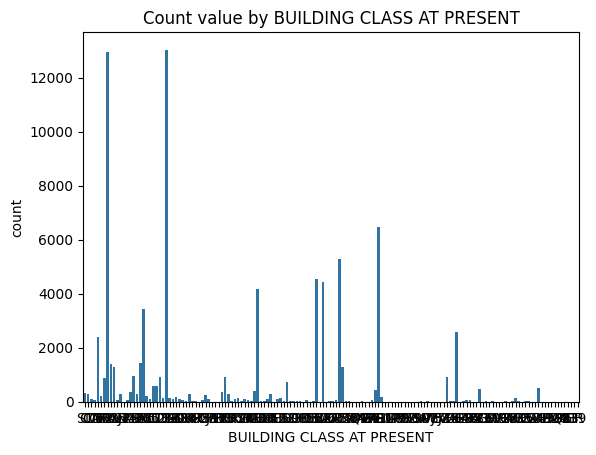

In [20]:
sns.countplot(data=df, x="BUILDING CLASS AT PRESENT")
plt.title("Count value by BUILDING CLASS AT PRESENT")
plt.show()

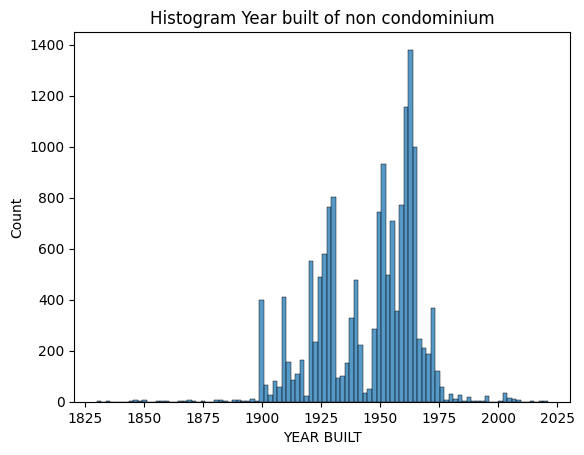

In [21]:
sns.histplot(df_non_condominium['YEAR BUILT'], bins=100, kde=False)
plt.title("Histogram Year built of non condominium")
plt.show()

### **Exporing** `YEAR BUILT`

In [22]:
df.sort_values(by='YEAR BUILT')

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4366,1,GREENWICH VILLAGE-WEST,13 CONDOS - ELEVATOR APARTMENTS,2,608,1713,NaN,R4,"118 WEST 13TH STREET, 04",04,...,1.0,NaN,1.0,NaN,NaN,190.0,2,R4,10250000,2025-07-30
34780,3,DOWNTOWN-METROTECH,13 CONDOS - ELEVATOR APARTMENTS,2,2058,1024,NaN,R4,"365 BRIDGE STREET, 3F",3F,...,1.0,NaN,1.0,NaN,NaN,1800.0,2,R4,1075000,2025-05-16
34789,3,DOWNTOWN-METROTECH,13 CONDOS - ELEVATOR APARTMENTS,2,2058,1178,NaN,R4,"101 WILLOUGHBY STREET, 12K",12K,...,1.0,NaN,1.0,NaN,NaN,1800.0,2,R4,0,2025-08-06
34781,3,DOWNTOWN-METROTECH,13 CONDOS - ELEVATOR APARTMENTS,2,2058,1032,NaN,R4,"365 BRIDGE STREET, 3N",3N,...,1.0,NaN,1.0,NaN,NaN,1800.0,2,R4,842500,2024-12-13
34779,3,DOWNTOWN-METROTECH,13 CONDOS - ELEVATOR APARTMENTS,2,2058,1005,NaN,R4,"365 BRIDGE STREET, 2D",2D,...,1.0,NaN,1.0,NaN,NaN,1800.0,2,R4,0,2024-12-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79464,5,WESTERLEIGH,01 ONE FAMILY DWELLINGS,1B,482,5,NaN,V0,2435 VICTORY BOULEVARD,NaN,...,0.0,0.0,0.0,2291.0,0.0,NaN,1,A1,730000,2024-11-06
79585,5,WESTERLEIGH,05 TAX CLASS 1 VACANT LAND,1B,389,57,NaN,V0,N/A VELTMAN AVENUE,NaN,...,0.0,0.0,0.0,2644.0,0.0,NaN,1,V0,0,2025-06-03
79586,5,WESTERLEIGH,05 TAX CLASS 1 VACANT LAND,1B,458,84,NaN,V0,N/A MARBLE STREET,NaN,...,0.0,0.0,0.0,1701.0,0.0,NaN,1,V0,500,2025-04-09
79880,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6926,78,NaN,V0,N/A SHELDON AVENUE,NaN,...,0.0,0.0,0.0,2000.0,0.0,NaN,1,V0,170000,2024-12-16


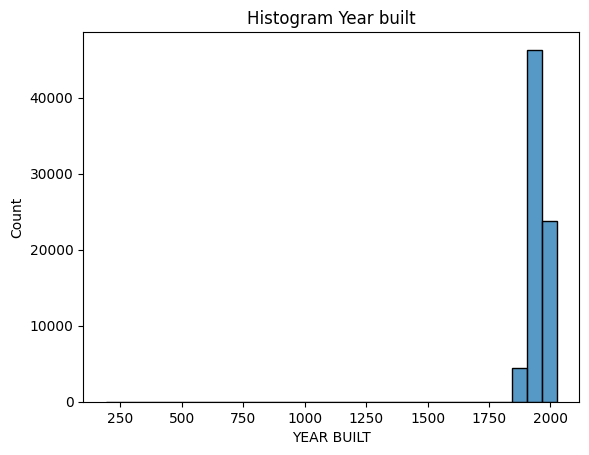

In [23]:
sns.histplot(df['YEAR BUILT'], bins=30, kde=False)
plt.title("Histogram Year built")
plt.show()

Have a building which was constructed in 190

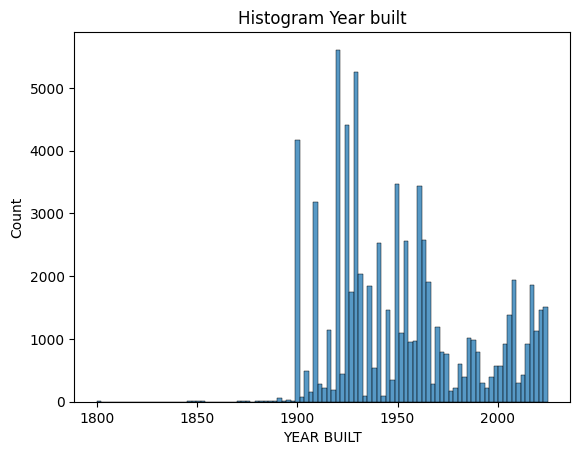

In [24]:
sns.histplot(df[df['YEAR BUILT'] != 190]['YEAR BUILT'], bins=100, kde=False)
plt.title("Histogram Year built")
plt.show()

### **Analysis regarding BOROUGH**

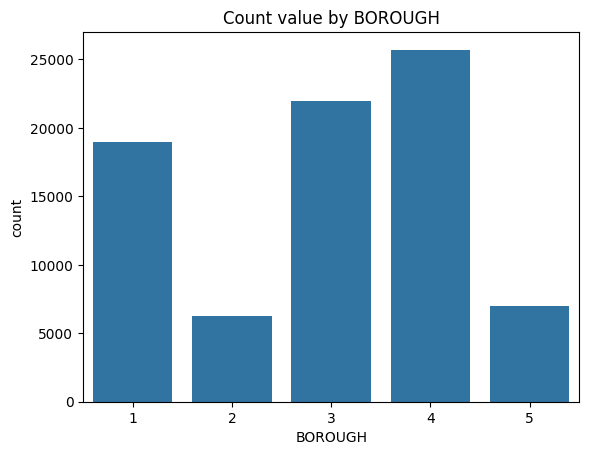

In [25]:
sns.countplot(data=df, x="BOROUGH")
plt.title("Count value by BOROUGH")
plt.show()

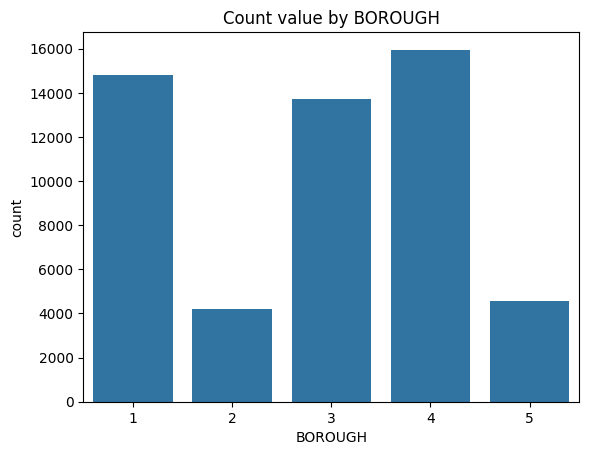

In [26]:
sns.countplot(data=df_no_zero, x="BOROUGH")
plt.title("Count value by BOROUGH")
plt.show()

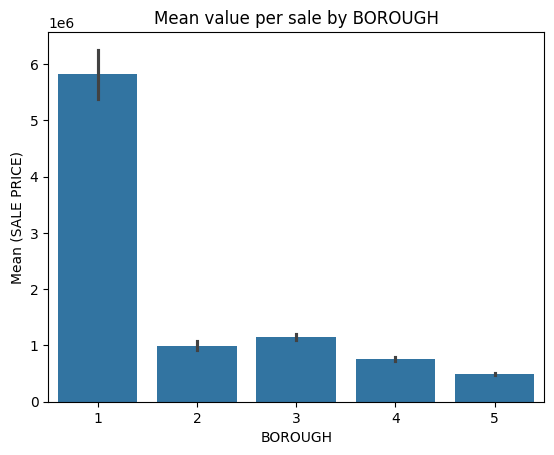

In [27]:
sns.barplot(
    data=df,
    x="BOROUGH",
    y="SALE PRICE",
    estimator='mean'
)

plt.title("Mean value per sale by BOROUGH")
plt.ylabel("Mean (SALE PRICE)")
plt.xlabel("BOROUGH")
plt.show()

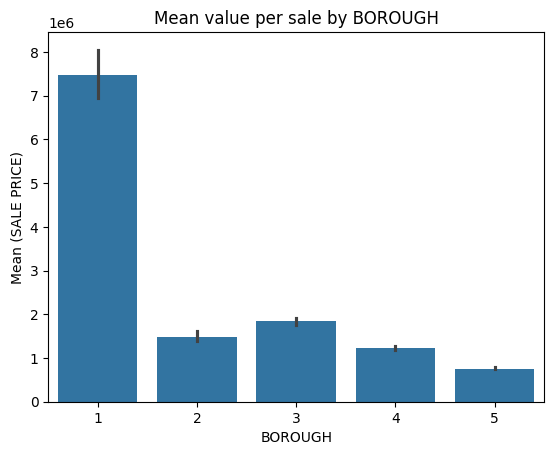

In [28]:
sns.barplot(
    data=df_no_zero,
    x="BOROUGH",
    y="SALE PRICE",
    estimator='mean'
)

plt.title("Mean value per sale by BOROUGH")
plt.ylabel("Mean (SALE PRICE)")
plt.xlabel("BOROUGH")
plt.show()

In [29]:
ratio_df = (
    df.groupby("BOROUGH")["SALE PRICE"]
      .apply(lambda x: (x == 0).sum() / len(x))
      .reset_index(name="zero_ratio")
)
ratio_df

,BOROUGH,zero_ratio
0,1,0.219050
1,2,0.330837
2,3,0.374299
3,4,0.379493
4,5,0.351012


### **Religious and asylum buidling**

In [30]:
df[df['BUILDING CLASS AT PRESENT'].str.contains(r'[MN]', na=False)]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
102,1,ALPHABET CITY,37 RELIGIOUS FACILITIES,4,386,14,NaN,M1,256 EAST 4TH STREET,NaN,...,0.0,1.0,1.0,2382.0,6575.0,1900.0,4,M1,2950000,2024-11-01
103,1,ALPHABET CITY,37 RELIGIOUS FACILITIES,4,390,58,NaN,M1,195 EAST 7 STREET,NaN,...,0.0,2.0,2.0,1380.0,3836.0,1920.0,4,M1,0,2025-03-18
1009,1,CHELSEA,37 RELIGIOUS FACILITIES,4,749,15,NaN,M3,343 WEST 25 STREET,NaN,...,0.0,2.0,2.0,4444.0,7925.0,1927.0,4,M3,48250000,2025-07-25
1010,1,CHELSEA,37 RELIGIOUS FACILITIES,4,749,17,NaN,M1,341 WEST 25 STREET,NaN,...,0.0,3.0,3.0,12838.0,31797.0,1927.0,4,M1,48250000,2025-07-25
1011,1,CHELSEA,37 RELIGIOUS FACILITIES,4,749,23,NaN,M1,329 WEST 25 STREET,NaN,...,0.0,1.0,1.0,2469.0,7300.0,1962.0,4,M1,48250000,2025-07-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77300,5,OAKWOOD,37 RELIGIOUS FACILITIES,4,4715,1,NaN,M9,3109 HYLAN BOULEVARD,NaN,...,1.0,1.0,2.0,5304.0,3720.0,1970.0,4,M9,0,2025-02-13
77605,5,PORT RICHMOND,37 RELIGIOUS FACILITIES,4,1024,15,NaN,M1,181 PORT RICHMOND AVENUE,NaN,...,0.0,1.0,1.0,3150.0,3100.0,1931.0,4,M1,1170000,2025-04-25
78281,5,ROSSVILLE-CHARLESTON,37 RELIGIOUS FACILITIES,4,7400,171,NaN,M1,19 WINANT PLACE,NaN,...,0.0,1.0,1.0,11748.0,2750.0,1931.0,4,M1,550000,2025-02-28
78676,5,STAPLETON,37 RELIGIOUS FACILITIES,4,565,43,NaN,M1,304 BROAD STREET,NaN,...,0.0,1.0,1.0,2550.0,3720.0,1931.0,4,M1,675000,2024-12-11


In [31]:
df['TAX CLASS AT PRESENT'].value_counts()

,count
TAX CLASS AT PRESENT,
1,35900
2,31213
4,5551
2C,2064
2A,2023
1A,1282
1B,907
2B,598
1C,206


/tmp/ipython-input-2896499129.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


<Axes: xlabel='SALE DATE', ylabel='num_transactions'>

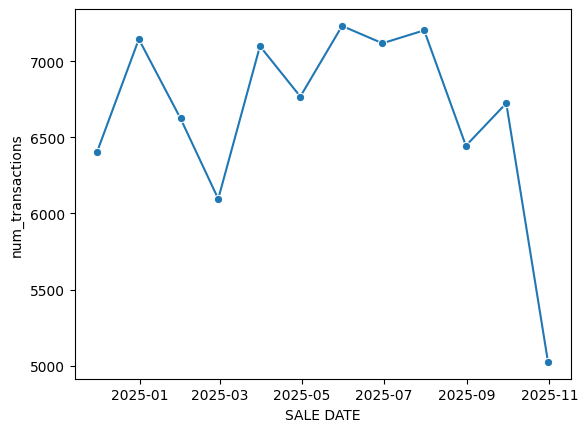

In [39]:
transactions = (
    df[df['SALE DATE'] <= '2025-10-31'].set_index("SALE DATE")
      .resample("M")
      .size()
      .reset_index(name="num_transactions")
)

sns.lineplot(data=transactions, x="SALE DATE", y="num_transactions", marker='o')

/tmp/ipython-input-2962929462.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


<Axes: xlabel='SALE DATE', ylabel='num_transactions'>

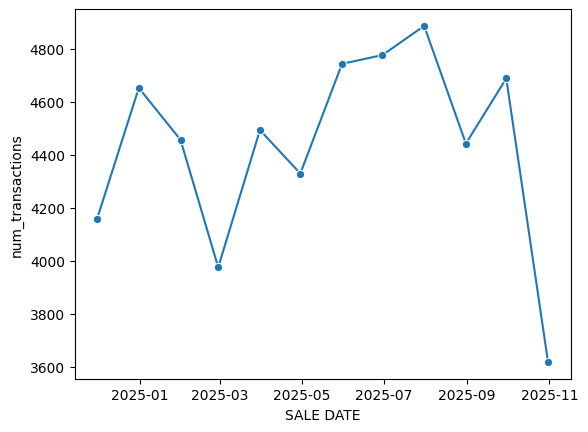

In [40]:
transactions = (
    df_no_zero[df_no_zero['SALE DATE'] <= '2025-10-31'].set_index("SALE DATE")
      .resample("M")
      .size()
      .reset_index(name="num_transactions")
)

sns.lineplot(data=transactions, x="SALE DATE", y="num_transactions", marker='o')

/tmp/ipython-input-3315033589.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["SALE PRICE"]


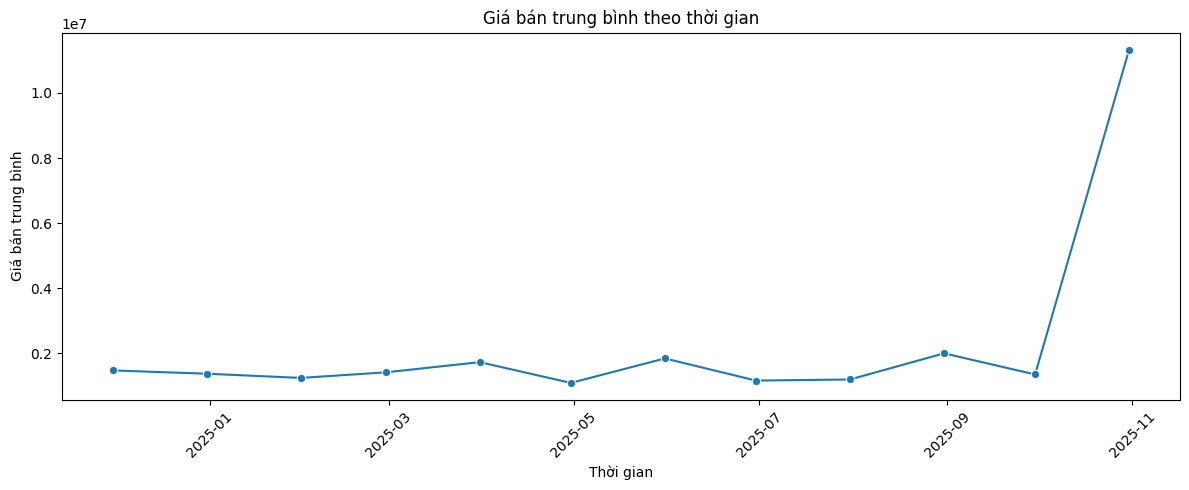

In [43]:
# tính GIÁ TRỊ TRUNG BÌNH theo tháng
avg_price_per_month = (
    df[df['SALE DATE'] <= '2025-10-31'].set_index("SALE DATE")
      .resample("M")["SALE PRICE"]
      .mean()
      .reset_index(name="avg_sale_price")
)

# vẽ lineplot
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=avg_price_per_month,
    x="SALE DATE",
    y="avg_sale_price",
    marker="o"
)

plt.title("Giá bán trung bình theo thời gian")
plt.xlabel("Thời gian")
plt.ylabel("Giá bán trung bình")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-52500825.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["SALE PRICE"]
/tmp/ipython-input-52500825.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["SALE PRICE"]


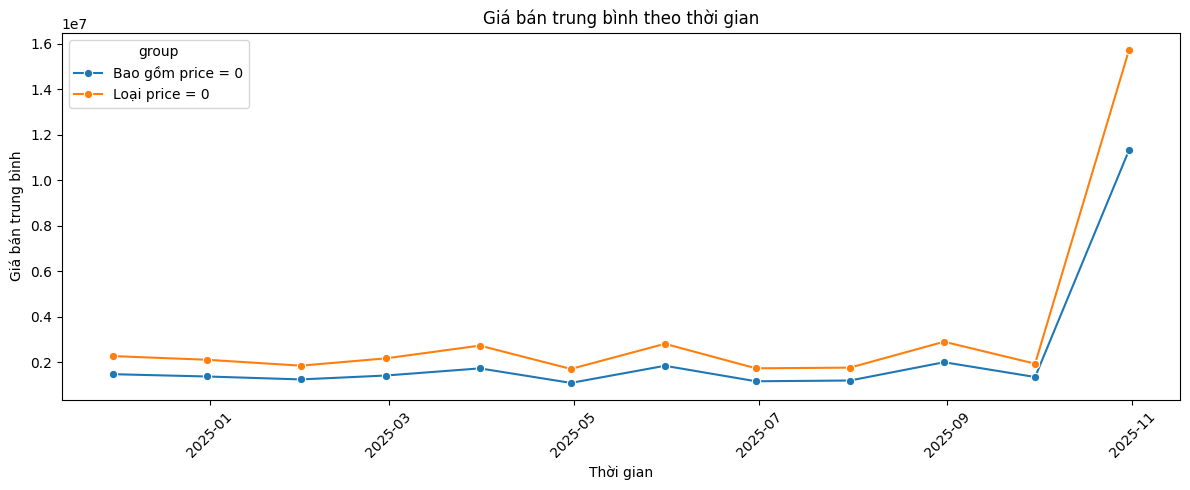

In [44]:
# 1) Tính trung bình theo tháng cho toàn bộ df
avg_all = (
    df[df['SALE DATE'] <= '2025-10-31']
      .set_index("SALE DATE")
      .resample("M")["SALE PRICE"]
      .mean()
      .reset_index(name="avg_sale_price")
)
avg_all["group"] = "Bao gồm price = 0"

# 2) Tính trung bình theo tháng cho df_no_zero
avg_no_zero = (
    df_no_zero[df_no_zero['SALE DATE'] <= '2025-10-31']
      .set_index("SALE DATE")
      .resample("M")["SALE PRICE"]
      .mean()
      .reset_index(name="avg_sale_price")
)
avg_no_zero["group"] = "Loại price = 0"

# 3) Gộp hai bảng lại
avg_both = pd.concat([avg_all, avg_no_zero], ignore_index=True)

# 4) Vẽ lineplot với 2 line
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=avg_both,
    x="SALE DATE",
    y="avg_sale_price",
    hue="group",      # 👈 phân biệt 2 line
    marker="o"
)

plt.title("Giá bán trung bình theo thời gian")
plt.xlabel("Thời gian")
plt.ylabel("Giá bán trung bình")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Tim xem co fill duoc NaN khong


In [45]:
df_pluto = pd.read_csv("pluto_25v3.csv")

In [47]:
df_pluto.head(-5)

,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,...,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,BX,2869,47,205,2024300,20243003000,243,3000,10.0,14,...,NaN,NaN,1.0,NaN,NaN,25v3,NaN,40.850594,-73.912743,NaN
1,MN,675,39,104,1009902,10099021001,99,1017,2.0,3,...,1.006750e+09,09/13/2019,1.0,1.0,1.0,25v3,NaN,40.753382,-74.004717,NaN
2,MN,698,54,104,1009902,10099021004,99,1030,2.0,3,...,NaN,NaN,1.0,NaN,1.0,25v3,NaN,40.750610,-74.003865,NaN
3,MN,698,56,104,1009902,10099021004,99,1030,2.0,3,...,NaN,NaN,1.0,NaN,1.0,25v3,NaN,40.750648,-74.003959,NaN
4,MN,698,28,104,1009902,10099021004,99,1030,2.0,3,...,NaN,NaN,1.0,NaN,NaN,25v3,NaN,40.750129,-74.003136,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,MN,1926,12,110,1022000,10220005001,220,5001,3.0,9,...,NaN,NaN,1.0,NaN,NaN,25v3,NaN,40.806713,-73.952286,NaN
6893,MN,1926,59,110,1022000,10220005001,220,5001,3.0,9,...,NaN,NaN,1.0,NaN,NaN,25v3,NaN,40.807161,-73.952481,NaN
6894,MN,1926,6,110,1022000,10220005001,220,5001,3.0,9,...,NaN,NaN,1.0,NaN,NaN,25v3,NaN,40.806938,-73.952528,NaN
6895,MN,1926,61,110,1022000,10220005001,220,5001,3.0,9,...,NaN,NaN,1.0,NaN,NaN,25v3,NaN,40.807199,-73.952636,NaN
